This is Kelly Wiseman's Ipython notebook from the completed Africa Soil Property Prediction Kaggle competition. Check out Kaggle's website for more competition details and data files.

# Africa Soil Property Prediction Challenge
Advances in rapid, low cost analysis of soil samples using infrared spectroscopy, georeferencing of soil samples, and greater availability of earth remote sensing data provide new opportunities for predicting soil functional properties at unsampled locations. Soil functional properties are those properties related to a soil’s capacity to support essential ecosystem services such as primary productivity, nutrient and water retention, and resistance to soil erosion. Digital mapping of soil functional properties, especially in data sparse regions such as Africa, is important for planning sustainable agricultural intensification and natural resources management.

Diffuse reflectance infrared spectroscopy has shown potential in numerous studies to provide a highly repeatable, rapid and low cost measurement of many soil functional properties. The amount of light absorbed by a soil sample is measured, with minimal sample preparation, at hundreds of specific wavebands across a range of wavelengths to provide an infrared spectrum. The measurement can be typically performed in about 30 seconds, in contrast to conventional reference tests, which are slow and expensive and use chemicals.

Conventional reference soil tests are calibrated to the infrared spectra on a subset of samples selected to span the diversity in soils in a given target geographical area. The calibration models are then used to predict the soil test values for the whole sample set. The predicted soil test values from georeferenced soil samples can in turn be calibrated to remote sensing covariates, which are recorded for every pixel at a fixed spatial resolution in an area, and the calibration model is then used to predict the soil test values for each pixel. The result is a digital map of the soil properties.

## Goal: Predict 5 target soil functional properties - Ca, pH, P, SOC, and Sand
For the competition, we were to submit the predicted value (float) for each of the five targets. Kaggle scores a portion of the test set publicly during the competition period, and reserves a portion for private scoring at the end of the competition. We were allowed to submit up to 3 predictions per day during the competition period, and had to choose two predictions for the final private scoring. Submissions are evaluated using the mean columnwise root mean squared error.

## Data
There are 3,594 predictive features, 5 target features, 1,157 training samples, and 727 test samples.

SOC, pH, Ca, P, Sand are the five target variables for predictions. The data have been monotonously transformed from the original measurements and thus include negative values.

Data fields:
* PIDN: unique soil sample identifier
* SOC: Soil organic carbon
* pH: pH values
* Ca: Mehlich-3 extractable Calcium
* P: Mehlich-3 extractable Phosphorus
* Sand: Sand content 
* m7497.96 - m599.76: There are 3,578 mid-infrared absorbance measurements. For example, the "m7497.96" column is the absorbance at wavenumber 7497.96 cm-1. We suggest you to remove spectra CO2 bands which are in the region m2379.76 to m2352.76, but you do not have to.
* Depth: Depth of the soil sample (2 categories: "Topsoil" - 0-20 cm, "Subsoil" - 20-50 cm)

Additional spatial predictors from remote sensing data sources. The data have been mean centered and scaled.
* BSA: average long-term Black Sky Albedo measurements from MODIS satellite images (BSAN = near-infrared, BSAS = shortwave, BSAV = visible)
* CTI: compound topographic index calculated from Shuttle Radar Topography Mission elevation data
* ELEV: Shuttle Radar Topography Mission elevation data
* EVI: average long-term Enhanced Vegetation Index from MODIS satellite images.
* LST: average long-term Land Surface Temperatures from MODIS satellite images (LSTD = day time temperature, LSTN = night time temperature)
* Ref: average long-term Reflectance measurements from MODIS satellite images (Ref1 = blue, Ref2 = red, Ref3 = near-infrared, * Ref7 = mid-infrared)
* Reli: topographic Relief calculated from Shuttle Radar Topography mission elevation data
* TMAP & TMFI: average long-term Tropical Rainfall Monitoring Mission data (TMAP = mean annual precipitation, TMFI = modified Fournier index)

## My Approach:
I first attempted to predict the target variables with an ordinary least squares linear regression model.  The benefits of this method are that it's quick, there are no parameters to tune, and one can predict multiple targets. However, the model predictions were bad -- the Kaggle public score was 1.05 (equivalent score to the all zeros benchmark) -- so I moved on to more complex models. I used two methods, Support Vector regression and Gradient Boosting regression. Both of these methods required me to predict the five targets individually. I extensively grid searched the input parameters for these models, optimizing the parameters for each of the five target values.

The trickiest part of this Kaggle challenge was that only 13% of the test data were used to calculate the public score.  There were only 1157 samples in the training set and 727 samples in the test set (with only 94 being used to calculate the public score), so there was a very large risk of overfitting. Because of this overfitting risk, I generally ignored the public Kaggle scores when selecting the two models for private scoring. Instead, I submitted the two models with the best cross-validation scores.

## Results
I submitted two Support Vector Regression models for the final competition scoring. The first model used a reduced feature data set.  The number of features used to predict the targets varied for each of the 5 targets.  SOC used the lowest number of features with 330, and Ca used the most with 980. The second model used all of the 3580 available features (except the CO2 bands that I removed from all of the models). The input parameters for the two final SVR models are listed in the previous section.  Epsilon didn't vary much for the 5 targets, ranging from 0.01 to 0.14.  Gamma, the parameter that defines how far the influence of a single training example reaches, was ~2 orders of magnitude larger for the P target models than for the other targets.  C, the regularization parameter, varied by ~3 orders of magnitude.  Ca and P were better fit by smoother models and pH, SOC, Sand were better fit by less regularized models.

The reduced feature model had a cross-validation score of 0.393 with std of 0.049 for 30 different iterations.  The public Kaggle score, based on 13% of the test data, was 0.467 and the private final score was 0.515. This model ranked better than my other final submission, at 530 out of 1232 submissions.  My second final model, based on all of the features, had a cross-validation score of 0.405 with std of 0.049 for 20 different iterations.  The public Kaggle score was 0.439 and the private score was 0.516.

My model with the best private score (not one of the two chosen for the competition), used a combination of full-feature and spectra-only data. I used all of the features for Ca and Sand and removed the 15 spatial features from P, pH, and SOC.  It also had a much larger C parameter (less regularized) for P. It had a cross-validation score of 0.442, a public Kaggle score of 0.443, and a private score of 0.504.  This model would have been ranked 170 out of the 1232 submissions.

This competition highlighted the challenges of modeling data sets with large number of features (dimensions) compared to samples. The feature to sample ratio was especially large during the testing phase of the competition, when only 94 samples were used. The regression models were improved by using different regularization parameters and predictive features for the 5 soil target features.

# Data Analysis

In [57]:
# import necessary python packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# Set up some better defaults for matplotlib
from matplotlib import rcParams
import brewer2mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 8)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

## Read data files

In [58]:
## Read data files into Pandas dataframe format ##
# 1158 rows
train_df = pd.read_csv('data/Africa_soil/training.csv', header=0)

# 728 rows
test_df = pd.read_csv('data/Africa_soil/sorted_test.csv', header=0) 

# Read submission file into Pandas dataframe format
sample_submission = pd.read_csv('data/Africa_soil/sample_submission.csv', header=0)

In [4]:
print train_df.head(2)
print test_df.head(2)

       PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  XNhoFZW5  0.302553  0.301137  0.299748  0.300354  0.302679  0.303799   
1  9XNspFTd  0.270192  0.268555  0.266964  0.267938  0.271013  0.272346   

   m7486.39  m7484.46  m7482.54    ...         REF7      RELI      TMAP  \
0  0.301702  0.298936  0.298126    ...    -0.646673  1.687734  0.190708   
1  0.269870  0.266976  0.266544    ...    -0.646673  1.687734  0.190708   

       TMFI    Depth        Ca         P        pH       SOC      Sand  
0  0.056843  Topsoil -0.295749 -0.041336 -1.129366  0.353258  1.269748  
1  0.056843  Subsoil -0.387442 -0.231552 -1.531538 -0.264023  1.692209  

[2 rows x 3600 columns]
       PIDN  m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  \
0  09gt9UK5  0.210899  0.209221  0.207645  0.208714  0.211972  0.213562   
1  0BVvxJ6a  0.191650  0.184120  0.177070  0.180624  0.192343  0.197502   

   m7486.39  m7484.46  m7482.54    ...         LSTD      LSTN      REF1  \
0  

## Clean data for regression models

In [5]:
# It is suggested to remove spectra CO2 bands which are in the region m2379.76 to m2352.76
train_df.drop(train_df.loc[:,'m2379.76':'m2352.76'], inplace=True, axis=1)
test_df.drop(test_df.loc[:,'m2379.76':'m2352.76'], inplace=True, axis=1)

In [6]:
# Encode depth values into topsoil and subsoil features
train_df['topsoil'] = np.where(train_df['Depth']=='Topsoil',1,0)
train_df['subsoil'] = np.where(train_df['Depth']=='Subsoil',1,0)
test_df['topsoil'] = np.where(test_df['Depth']=='Topsoil',1,0)
test_df['subsoil'] = np.where(test_df['Depth']=='Subsoil',1,0)

In [7]:
# Separate target features from the train dataframe
target_df = train_df.loc[:,['PIDN','Ca','P','pH','SOC','Sand']]
target_df.head(2)

PIDN        Ca         P        pH       SOC      Sand
0  XNhoFZW5 -0.295749 -0.041336 -1.129366  0.353258  1.269748
1  9XNspFTd -0.387442 -0.231552 -1.531538 -0.264023  1.692209

In [8]:
# Drop target features from the train data
train_df.drop(train_df.loc[:,'Ca':'Sand'], inplace=True, axis=1)
# Drop depth categorical feature from the train and test data (replaced by topsoil and subsoil)
train_df.drop('Depth', inplace=True, axis=1)
test_df.drop('Depth', inplace=True, axis=1)

In [9]:
# Convert data to Numpy NDFrame
train_df.drop('PIDN', inplace=True, axis=1)
test_df.drop('PIDN', inplace=True, axis=1)
target_df.drop('PIDN', inplace=True, axis=1)
train = train_df.astype(float).values
test = test_df.astype(float).values
target = target_df.astype(float).values

In [10]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

#### Training and Test data without the spatial features

In [11]:
# Drop spatial data
train_noSpatial_df = train_df.drop(train_df.loc[:,'BSAN':'TMFI'], axis=1)
test_noSpatial_df = test_df.drop(train_df.loc[:,'BSAN':'TMFI'], axis=1)
# Convert data to Numpy NDFrame
train_noSpatial = train_noSpatial_df.astype(float).values
test_noSpatial = test_noSpatial_df.astype(float).values
# Standardize features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler().fit(train_noSpatial)
train_noSpa_scaled = scaler.transform(train_noSpatial)
test_noSpa_scaled = scaler.transform(test_noSpatial)

In [23]:
print np.shape(train)
print np.shape(train_noSpatial)

(1157, 3580)
(1157, 3565)


## Visualize features

#### Infrared Spectra predictors

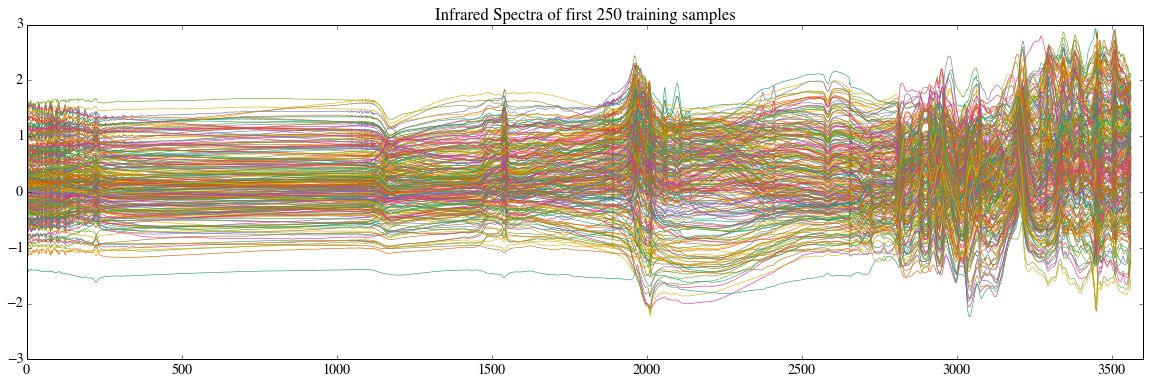

In [54]:
plt.figure(figsize=(20,6))
plt.subplot(111)
plt.title('Infrared Spectra of first 250 training samples')
plt.xlim(0,3600)
for i in range(0,250):
    plt.plot(train_noSpa_scaled[i,0:-2], lw=0.6)

#### Spaital predictors

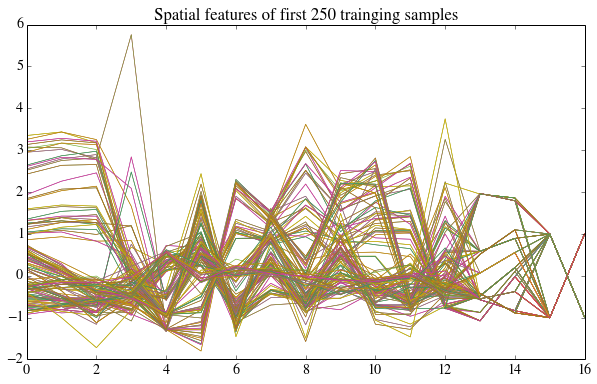

In [56]:
plt.figure(figsize=(10,6))
plt.subplot(111)
plt.title('Spatial features of first 250 trainging samples')
for i in range(0,250):
    plt.plot(train_scaled[i,3563:], lw=0.6)

#### Target features

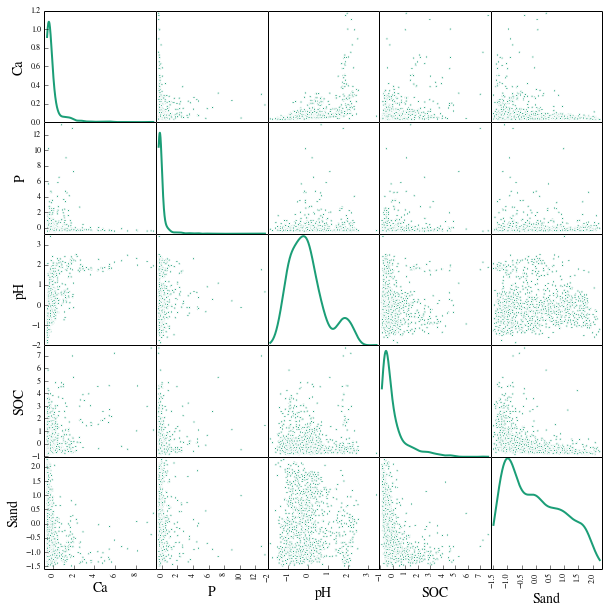

In [94]:
# Plot the target features
_ = pd.scatter_matrix(target_df.loc[:,'Ca':'Sand'], figsize=(10,10),diagonal='kde', alpha=1.0)

In [66]:
pd.DataFrame.corr(target_df)

Ca         P        pH       SOC      Sand
Ca    1.000000  0.098220  0.589843  0.416647 -0.286223
P     0.098220  1.000000  0.153800  0.164654 -0.027765
pH    0.589843  0.153800  1.000000  0.024758 -0.049869
SOC   0.416647  0.164654  0.024758  1.000000 -0.502359
Sand -0.286223 -0.027765 -0.049869 -0.502359  1.000000

### Log transform Ca, P, and SOC

I tried log transforming the targets with extremely skewed distributions (Ca, P, and SOC) to see if I'd get better predictions.  The cross-validation fits to the transformed targets did improve by ~8% (using the Support Vector Regression method), but the cross-validation score was worse than before once I inverted the predictions. Therefore I chose to model the non-transformed targets for my competition submissions.

In [25]:
# transform Ca, P and SOC
target_transform_df = target_df
target_transform_df['Ca'] =np.log(target_transform_df['Ca']+0.6)
target_transform_df['P'] =np.log(target_transform_df['P']+0.5)
target_transform_df['SOC'] =np.log(target_transform_df['SOC']+0.9)
target_transform = target_transform_df.astype(float).values

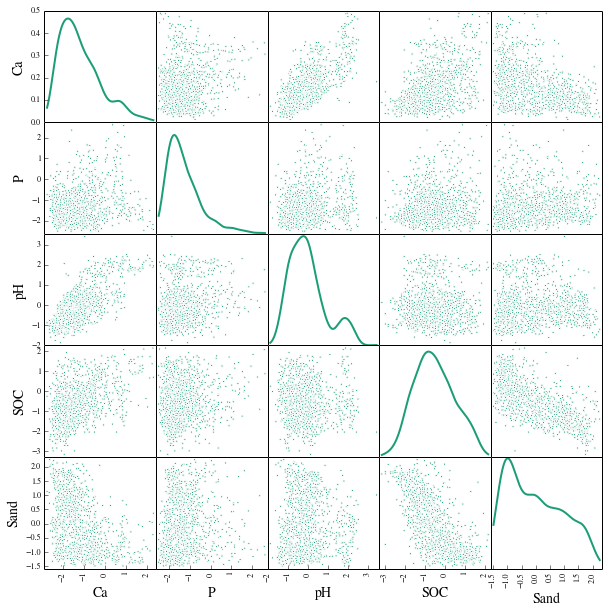

In [26]:
# Plot the target features
_ = pd.scatter_matrix(target_transform_df.loc[:,'Ca':'Sand'], figsize=(10,10),diagonal='kde', alpha=1.0)

## Model the data

### Define scorer

In [61]:
# make root mean squared error scorer to use in grid search #
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

rmse_scorer = make_scorer(rmse, greater_is_better=False)

### Linear regression model

In [64]:
## Linear regression model ##

from sklearn.cross_validation import train_test_split
from sklearn import linear_model

## 3-1 split cross-validation ##
random_states = [100, 10, 500, 700, 50, 5, 67, 222, 673, 490] # 10 iterations
mcrmse_all = []
for r in random_states:
# Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25,random_state=r)
    # Create the linear regression object
    lin = linear_model.LinearRegression()
    # Fit the training data to the targets
    lin.fit(X_train, y_train)
    # Make preditions and write to file
    preds = lin.predict(X_test)

    # Calculate error metrics
    from sklearn.metrics import mean_squared_error
    mseCa = mean_squared_error(y_test[:,0], preds[:,0])
    mseP = mean_squared_error(y_test[:,1], preds[:,1])
    msepH = mean_squared_error(y_test[:,2], preds[:,2])
    mseSOC = mean_squared_error(y_test[:,3], preds[:,3])
    mseSand = mean_squared_error(y_test[:,4], preds[:,4])
    mse = [mseCa, mseP, msepH, mseSOC, mseSand]
    rmse = np.sqrt(mse)
    mcrmse = 0.2*(np.sum(rmse))
    mcrmse_all.append(mcrmse)
print 'cross validated MCRMSE mean =',np.mean(mcrmse_all),'std =',np.std(mcrmse_all) 

## Model based on all the data ##
from sklearn import linear_model
# Create the linear regression object
lin = linear_model.LinearRegression()

# Fit the training data to the targets
lin.fit(train, target)

print 'linear regression coefficients are', lin.coef_
print 'intercept is',lin.intercept_

# Make preditions and write to file
preds = lin.predict(test)
preds_Ca = preds[:,0]
preds_P = preds[:,1]
preds_pH = preds[:,2]
preds_SOC = preds[:,3]
preds_Sand = preds[:,4]
sample_submission['Ca'] = preds_Ca
sample_submission['P'] = preds_P
sample_submission['pH'] = preds_pH
sample_submission['SOC'] = preds_SOC
sample_submission['Sand'] = preds_Sand
sample_submission.to_csv('data/Africa_soil/LinReg_noCO2.csv', index = False)

cross validated MCRMSE mean = 0.706344229893 std = 0.100957336294
linear regression coefficients are [[  4.82319991e+01  -1.15148196e+02   6.38062255e+00 ...,   1.29151224e-01
   -3.78620133e-02  -8.52808211e-02]
 [ -1.22676695e+02  -6.46913980e+01  -5.29665383e+01 ...,   3.04447569e-02
    1.41308898e-01   5.53643174e-02]
 [  4.03213683e+01   2.75985577e+01  -7.72367587e+01 ...,   6.42238694e-02
    1.36725686e-01  -1.32616798e-02]
 [  1.45318671e+01  -3.48927137e+01  -2.36526900e+01 ...,   7.40485372e-02
   -2.36602864e-02  -3.56822262e-02]
 [ -1.05200265e+02   2.13320211e+02  -2.58029454e+01 ...,   1.23853251e-01
   -4.49166724e-02  -1.07972428e-01]]
intercept is [-1.30821843 -4.80834503 -1.00395827 -0.54469443  0.68065473]


### Gradient Boosting Regression

I've had success with Gradient Boosting for classification problems, so I decided to give Gradient Boosting Regression a try for this competition.

The advantages of Gradient Boosting Regression are:
* Natural handling of data of mixed type - which isn't really a problem for this competition
* Robustness to outliers

The disadvantages:
* It doesn't scale well, and takes more processing time than other methods
* There are numerous parameters to tune
* It doesn't perform as well when there are more dimensions than samples.

#### Parameters

Since the parameters interact with each other (learning_rate and n_estimators, learning_rate and subsample, max_depth and max_features), we usually follow this recipe to tune them for a gradient boosting model:

* Choose loss function and scorer based on problem at hand
* Pick n_estimators as large as computationally possible (e.g. 2000). 
* Tune max_depth, learning_rate, min_samples_leaf, and max_features via grid search. 
* Increase n_estimators even more and tune learning_rate again holding the other parameters fixed.

In [68]:
# This is an example of fine tuning my grid search for target P after I'd already done a wider parameter search.
# I did separate parameter grid searches for all of the 5 target features.
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(len(train_noSpa_scaled), n_iter=5, test_size=0.25, random_state=35)

print 'P train'
param_grid = {'alpha':[0.8],'learning_rate':[0.01,0.025,0.05], 'max_depth':[11], 'n_estimators':[7500]}
est = GradientBoostingRegressor(min_samples_leaf=2, loss='huber', max_features=7)
clf = GridSearchCV(est, param_grid, cv=cv, scoring=rmse_scorer, verbose=2)
clf.fit(train_scaled_red, target[:,1])
print clf.grid_scores_
print clf.best_params_


P train
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[GridSearchCV] n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 ..
[GridSearchCV]  n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 - 1.9min
[GridSearchCV] n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 ..
[GridSearchCV]  n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 - 1.8min
[GridSearchCV] n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 ..
[GridSearchCV]  n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 - 1.9min
[GridSearchCV] n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 ..
[GridSearchCV]  n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 - 2.5min
[GridSearchCV] n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 ..
[GridSearchCV]  n_estimators=7500, alpha=0.8, learning_rate=0.01, max_depth=11 - 1.9min
[GridSearchCV] n_estimators=7500, alpha=0.8, learning_rate=0.025, max_depth=11 .
[GridS

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 26.3min finished



[mean: -1.09686, std: 0.12014, params: {'n_estimators': 7500, 'alpha': 0.8, 'learning_rate': 0.01, 'max_depth': 11}, mean: -1.10616, std: 0.11837, params: {'n_estimators': 7500, 'alpha': 0.8, 'learning_rate': 0.025, 'max_depth': 11}, mean: -1.08527, std: 0.11712, params: {'n_estimators': 7500, 'alpha': 0.8, 'learning_rate': 0.05, 'max_depth': 11}]
{'n_estimators': 7500, 'alpha': 0.8, 'learning_rate': 0.05, 'max_depth': 11}


### Support Vector Regression

The advantages of Support Vector Regression for this competition are:
* It's effective in high dimensional spaces
* It's still effective when the number of dimensions (features) is greater than the number of samples
* There are less parameters to tune than Gradient Boosting Regression

#### Parameters

The default kernal is rbf, with other options: linear, poly, sigmoid. I tested the linear, poly (with degree ranging from 2 to 5) and rbf kernals, and the rbf kernal performed best.

The gamma parameter defines how far the influence of a single training example reaches, 
with low values meaning ‘far’ and high values meaning ‘close’. The C parameter trades off misclassification
of training examples against simplicity of the decision surface. A low C makes the decision surface smooth,
while a high C aims at classifying all training examples correctly.

Epsilon specifies the epsilon-tube within which no penalty is associated in the
training loss function with points predicted within a distance epsilon from the actual value.

The default parameters are C = 1.0, epsilon = 0.1, and gamma = 0.0 (actually uses gamma=1/n_features).

#### Grid search parameters

In [38]:
# This is an example of fine tuning my grid search for each target after I'd already done a wider parameter search.
# You can see that each target (fitted with and without spatial data) prefers different model parameters.
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(len(train), n_iter=5, test_size=0.25, random_state=35)

print 'Ca train'
param_grid = [{'C': [100, 200, 300],'epsilon':[0.001, 0.005, 0.01], 'gamma':[0.01,0.005,0.001]}]
svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train, target[:,0])
print clf.grid_scores_
print clf.best_params_

print 'Ca train_noSpatial'
param_grid = [{'C': [30000, 50000],'epsilon':[0.005, 0.01, 0.02], 'gamma':[5e-4,1e-4,5e-5]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train_noSpatial, target[:,0])
print clf.grid_scores_
print clf.best_params_

print 'P train'
param_grid = [{'C': [1.0, 5.0, 10.0],'epsilon':[0.01, 0.025, 0.05], 'gamma':[0.075, 0.05, 0.01]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train, target[:,1])
print clf.grid_scores_
print clf.best_params_

print 'P train_noSpatial'
param_grid = [{'C': [1.0, 5.0, 10.0],'epsilon':[0.025, 0.05, 0.075], 'gamma':[0.075, 0.05, 0.01]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train_noSpatial, target[:,1])
print clf.grid_scores_
print clf.best_params_

print 'pH train'
param_grid = [{'C': [400.0, 700.0],'epsilon':[0.05], 'gamma':[0.005, 0.001, 0.0005]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train, target[:,2])
print clf.grid_scores_
print clf.best_params_

print 'pH train_noSpatial'
param_grid = [{'C': [1000.0,3000.0, 4000.0],'epsilon':[0.01,0.05, 0.1], 'gamma':[0.001]}]
svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train_noSpatial, target[:,2])
print clf.grid_scores_
print clf.best_params_

print 'SOC train'
param_grid = [{'C': [20000.0],'epsilon':[0.01, 0.02, 0.05], 'gamma':[5e-4,1e-4,5e-5]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train, target[:,3])
print clf.grid_scores_
print clf.best_params_

print 'SOC train_noSpatial'
param_grid = [{'C': [25000.0],'epsilon':[0.0005], 'gamma':[5e-4,1e-4,5e-5]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train_noSpatial, target[:,3])
print clf.grid_scores_
print clf.best_params_

print 'Sand train'
param_grid = [{'C': [200.0, 400.0, 1000.0],'epsilon':[0.05, 0.1, 0.2], 'gamma':[0.05, 0.01, 0.005]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train, target[:,4])
print clf.grid_scores_
print clf.best_params_

print 'Sand train_noSpatial'
param_grid = [{'C': [800.0, 1000.0, 1500.0],'epsilon':[0.05, 0.1,0.2], 'gamma':[0.005, 0.001, 0.0005]}]
svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train_noSpatial, target[:,4])
print clf.grid_scores_
print clf.best_params_

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    9.9s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:  7.8min


Ca train
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[mean: -0.38078, std: 0.11022, params: {'epsilon': 0.001, 'C': 100, 'gamma': 0.01}, mean: -0.35274, std: 0.08529, params: {'epsilon': 0.001, 'C': 100, 'gamma': 0.005}, mean: -0.38035, std: 0.09818, params: {'epsilon': 0.001, 'C': 100, 'gamma': 0.001}, mean: -0.38031, std: 0.10941, params: {'epsilon': 0.005, 'C': 100, 'gamma': 0.01}, mean: -0.35171, std: 0.08535, params: {'epsilon': 0.005, 'C': 100, 'gamma': 0.005}, mean: -0.38046, std: 0.09795, params: {'epsilon': 0.005, 'C': 100, 'gamma': 0.001}, mean: -0.38014, std: 0.10872, params: {'epsilon': 0.01, 'C': 100, 'gamma': 0.01}, mean: -0.35062, std: 0.08548, params: {'epsilon': 0.01, 'C': 100, 'gamma': 0.005}, mean: -0.38181, std: 0.09890, params: {'epsilon': 0.01, 'C': 100, 'gamma': 0.001}, mean: -0.39266, std: 0.10759, params: {'epsilon': 0.001, 'C': 200, 'gamma': 0.01}, mean: -0.34354, std: 0.05629, params: {'epsilon': 0.001, 'C': 200, 'gamma': 0.005}, mean: -0.35

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 24.1min finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:  6.0min
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 14.3min finished



{'epsilon': 0.01, 'C': 200, 'gamma': 0.005}
P train
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[mean: -1.09471, std: 0.12765, params: {'epsilon': 0.01, 'C': 1.0, 'gamma': 0.075}, mean: -1.10048, std: 0.12885, params: {'epsilon': 0.01, 'C': 1.0, 'gamma': 0.05}, mean: -1.13723, std: 0.12839, params: {'epsilon': 0.01, 'C': 1.0, 'gamma': 0.01}, mean: -1.09340, std: 0.12709, params: {'epsilon': 0.025, 'C': 1.0, 'gamma': 0.075}, mean: -1.09876, std: 0.12858, params: {'epsilon': 0.025, 'C': 1.0, 'gamma': 0.05}, mean: -1.13653, std: 0.12825, params: {'epsilon': 0.025, 'C': 1.0, 'gamma': 0.01}, mean: -1.09152, std: 0.12614, params: {'epsilon': 0.05, 'C': 1.0, 'gamma': 0.075}, mean: -1.09662, std: 0.12785, params: {'epsilon': 0.05, 'C': 1.0, 'gamma': 0.05}, mean: -1.13461, std: 0.12754, params: {'epsilon': 0.05, 'C': 1.0, 'gamma': 0.01}, mean: -1.01204, std: 0.11256, params: {'epsilon': 0.01, 'C': 5.0, 'gamma': 0.075}, mean: -1.02262, std: 0.11258, params: {'epsilon': 0.01, '

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:  4.0min



{'epsilon': 0.025, 'C': 10.0, 'gamma': 0.05}
P train_noSpatial
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[mean: -1.10095, std: 0.12807, params: {'epsilon': 0.025, 'C': 1.0, 'gamma': 0.075}, mean: -1.10685, std: 0.12766, params: {'epsilon': 0.025, 'C': 1.0, 'gamma': 0.05}, mean: -1.13922, std: 0.12693, params: {'epsilon': 0.025, 'C': 1.0, 'gamma': 0.01}, mean: -1.09874, std: 0.12771, params: {'epsilon': 0.05, 'C': 1.0, 'gamma': 0.075}, mean: -1.10437, std: 0.12748, params: {'epsilon': 0.05, 'C': 1.0, 'gamma': 0.05}, mean: -1.13711, std: 0.12714, params: {'epsilon': 0.05, 'C': 1.0, 'gamma': 0.01}, mean: -1.09686, std: 0.12724, params: {'epsilon': 0.075, 'C': 1.0, 'gamma': 0.075}, mean: -1.10210, std: 0.12726, params: {'epsilon': 0.075, 'C': 1.0, 'gamma': 0.05}, mean: -1.13532, std: 0.12617, params: {'epsilon': 0.075, 'C': 1.0, 'gamma': 0.01}, mean: -1.04122, std: 0.11838, params: {'epsilon': 0.025, 'C': 5.0, 'gamma': 0.075}, mean: -1.05793, std: 0.12203, params: {'ep

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 11.3min finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    9.5s



{'epsilon': 0.05, 'C': 10.0, 'gamma': 0.075}
pH train
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[mean: -0.38673, std: 0.01988, params: {'epsilon': 0.05, 'C': 400.0, 'gamma': 0.005}, mean: -0.35416, std: 0.01967, params: {'epsilon': 0.05, 'C': 400.0, 'gamma': 0.001}, mean: -0.37581, std: 0.02468, params: {'epsilon': 0.05, 'C': 400.0, 'gamma': 0.0005}, mean: -0.40254, std: 0.01904, params: {'epsilon': 0.05, 'C': 700.0, 'gamma': 0.005}, mean: -0.34462, std: 0.01775, params: {'epsilon': 0.05, 'C': 700.0, 'gamma': 0.001}, mean: -0.36519, std: 0.02172, params: {'epsilon': 0.05, 'C': 700.0, 'gamma': 0.0005}]

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    9.6s



{'epsilon': 0.05, 'C': 700.0, 'gamma': 0.001}
pH train_noSpatial
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[mean: -0.35356, std: 0.01812, params: {'epsilon': 0.01, 'C': 1000.0, 'gamma': 0.001}, mean: -0.34941, std: 0.01846, params: {'epsilon': 0.05, 'C': 1000.0, 'gamma': 0.001}, mean: -0.34861, std: 0.01620, params: {'epsilon': 0.1, 'C': 1000.0, 'gamma': 0.001}, mean: -0.34793, std: 0.01196, params: {'epsilon': 0.01, 'C': 3000.0, 'gamma': 0.001}, mean: -0.34446, std: 0.01352, params: {'epsilon': 0.05, 'C': 3000.0, 'gamma': 0.001}, mean: -0.34448, std: 0.01303, params: {'epsilon': 0.1, 'C': 3000.0, 'gamma': 0.001}, mean: -0.34848, std: 0.01517, params: {'epsilon': 0.01, 'C': 4000.0, 'gamma': 0.001}, mean: -0.34676, std: 0.01592, params: {'epsilon': 0.05, 'C': 4000.0, 'gamma': 0.001}, mean: -0.34349, std: 0.01479, params: {'epsilon': 0.1, 'C': 4000.0, 'gamma': 0.001}]
{'epsilon': 0.1, 'C': 4000.0, 'gamma': 0.001}
SOC train
Fitting 5 folds for each of 9 candidates, tota

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 10.0min finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  1.4min



[mean: -0.30667, std: 0.08235, params: {'epsilon': 0.01, 'C': 20000.0, 'gamma': 0.0005}, mean: -0.28019, std: 0.04671, params: {'epsilon': 0.01, 'C': 20000.0, 'gamma': 0.0001}, mean: -0.30659, std: 0.04436, params: {'epsilon': 0.01, 'C': 20000.0, 'gamma': 5e-05}, mean: -0.30623, std: 0.08224, params: {'epsilon': 0.02, 'C': 20000.0, 'gamma': 0.0005}, mean: -0.28006, std: 0.04670, params: {'epsilon': 0.02, 'C': 20000.0, 'gamma': 0.0001}, mean: -0.30469, std: 0.04600, params: {'epsilon': 0.02, 'C': 20000.0, 'gamma': 5e-05}, mean: -0.30251, std: 0.07190, params: {'epsilon': 0.05, 'C': 20000.0, 'gamma': 0.0005}, mean: -0.27419, std: 0.04168, params: {'epsilon': 0.05, 'C': 20000.0, 'gamma': 0.0001}, mean: -0.30363, std: 0.04831, params: {'epsilon': 0.05, 'C': 20000.0, 'gamma': 5e-05}]

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 22.5min finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  1.7min



{'epsilon': 0.05, 'C': 20000.0, 'gamma': 0.0001}
SOC train_noSpatial
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[mean: -0.30504, std: 0.07280, params: {'epsilon': 0.0005, 'C': 25000.0, 'gamma': 0.0005}, mean: -0.30698, std: 0.06471, params: {'epsilon': 0.0005, 'C': 25000.0, 'gamma': 0.0001}, mean: -0.31379, std: 0.03498, params: {'epsilon': 0.0005, 'C': 25000.0, 'gamma': 5e-05}]

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 12.2min finished
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:  5.6min
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 15.2min finished



{'epsilon': 0.0005, 'C': 25000.0, 'gamma': 0.0005}
Sand train_noSpatial
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[mean: -0.41553, std: 0.04605, params: {'epsilon': 0.05, 'C': 800.0, 'gamma': 0.005}, mean: -0.34518, std: 0.02672, params: {'epsilon': 0.05, 'C': 800.0, 'gamma': 0.001}, mean: -0.35999, std: 0.02855, params: {'epsilon': 0.05, 'C': 800.0, 'gamma': 0.0005}, mean: -0.41660, std: 0.04858, params: {'epsilon': 0.1, 'C': 800.0, 'gamma': 0.005}, mean: -0.34465, std: 0.02605, params: {'epsilon': 0.1, 'C': 800.0, 'gamma': 0.001}, mean: -0.35587, std: 0.02812, params: {'epsilon': 0.1, 'C': 800.0, 'gamma': 0.0005}, mean: -0.43371, std: 0.04610, params: {'epsilon': 0.2, 'C': 800.0, 'gamma': 0.005}, mean: -0.34699, std: 0.02297, params: {'epsilon': 0.2, 'C': 800.0, 'gamma': 0.001}, mean: -0.35287, std: 0.02511, params: {'epsilon': 0.2, 'C': 800.0, 'gamma': 0.0005}, mean: -0.42625, std: 0.04953, params: {'epsilon': 0.05, 'C': 1000.0, 'gamma': 0.005}, mean: -0.34420, 

#### Feature ranking and selection

In [72]:
## This script does feature ranking by recursive feature elimination ##

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(len(train_scaled), n_iter=3, test_size=0.25, random_state=35)
estimator = SVR(kernel='linear', tol=0.001,C=1.0,epsilon=0.1)

## Ca
# steps by 50 features, decrease the step number to be more precise with your feature selection - but it'll take longer
rfecv = RFECV(estimator, step=50, cv=cv, scoring=rmse_scorer, verbose=1) 
rfecv.fit(train_scaled, target[:,0])
# feature rankings are ordered with lower values being more favorable
print("Optimal number of features for P : %d" % rfecv.n_features_)
# scale the cv scores to account for sklearn bug (it sums the cv scores and divides by n-1)
scores = rfecv.grid_scores_ * ((3.0-1.0)/3.0)
# scale the cv scores by -1 to account for sklearn make_scorer function that forces the score to be negative
# if you want smaller values to be better
ca_scores = -1.0*scores

# write output to files
# save cv grid_scores to file
f = open('data/Africa_soil/feature_cv_scores_Ca.txt', "w")
f.write("\n".join(map(lambda x: str(x), ca_scores)))
f.close()
# save feature ranking to file
f = open('data/Africa_soil/ranking_Ca.txt', "w")
f.write("\n".join(map(lambda x: str(x), rfecv.ranking_)))
f.close()
# save best features
train_scaled_redCa = rfecv.transform(train_scaled)
np.savetxt('data/Africa_soil/train_scaled_red_Ca.csv', train_scaled_redCa, delimiter=",")

## P
rfecv = RFECV(estimator, step=50, cv=cv, scoring=rmse_scorer, verbose=1) 
rfecv.fit(train_scaled, target[:,1])
print("Optimal number of features for P : %d" % rfecv.n_features_)
scores = rfecv.grid_scores_ * ((3.0-1.0)/3.0)
p_scores = -1.0*scores

# write output to files
f = open('data/Africa_soil/feature_cv_scores_P.txt', "w")
f.write("\n".join(map(lambda x: str(x), p_scores)))
f.close()
f = open('data/Africa_soil/ranking_P.txt', "w")
f.write("\n".join(map(lambda x: str(x), rfecv.ranking_)))
f.close()
train_scaled_redP = rfecv.transform(train_scaled)
np.savetxt('data/Africa_soil/train_scaled_red_P.csv', train_scaled_redP, delimiter=",")

## pH
rfecv = RFECV(estimator, step=50, cv=cv, scoring=rmse_scorer, verbose=1) 
rfecv.fit(train_scaled, target[:,2])
print("Optimal number of features for pH: %d" % rfecv.n_features_)
scores = rfecv.grid_scores_ * ((3.0-1.0)/3.0)
ph_scores = -1.0*scores

# write output to files
f = open('data/Africa_soil/feature_cv_scores_pH.txt', "w")
f.write("\n".join(map(lambda x: str(x), ph_scores)))
f.close()
f = open('data/Africa_soil/ranking_pH.txt', "w")
f.write("\n".join(map(lambda x: str(x), rfecv.ranking_)))
f.close()
train_scaled_redpH = rfecv.transform(train_scaled)
np.savetxt('data/Africa_soil/train_scaled_red_pH.csv', train_scaled_redpH, delimiter=",")

## SOC
rfecv = RFECV(estimator, step=50, cv=cv, scoring=rmse_scorer, verbose=1) 
rfecv.fit(train_scaled, target[:,3])
print("Optimal number of features for SOC: %d" % rfecv.n_features_)
scores = rfecv.grid_scores_ * ((3.0-1.0)/3.0)
soc_scores = -1.0*scores

# write output to files
f = open('data/Africa_soil/feature_cv_scores_SOC.txt', "w")
f.write("\n".join(map(lambda x: str(x), soc_scores)))
f.close()
f = open('data/Africa_soil/ranking_SOC.txt', "w")
f.write("\n".join(map(lambda x: str(x), rfecv.ranking_)))
f.close()
train_scaled_redSOC = rfecv.transform(train_scaled)
np.savetxt('data/Africa_soil/train_scaled_red_SOC.csv', train_scaled_redSOC, delimiter=",")

## Sand
rfecv = RFECV(estimator, step=50, cv=cv, scoring=rmse_scorer, verbose=1) 
rfecv.fit(train_scaled, target[:,4])
print("Optimal number of features for Sand : %d" % rfecv.n_features_)
scores = rfecv.grid_scores_ * ((3.0-1.0)/3.0)
sand_scores = -1.0*scores

# write output to files
f = open('data/Africa_soil/feature_cv_scores_Sand.txt', "w")
f.write("\n".join(map(lambda x: str(x), sand_scores)))
f.close()
f = open('data/Africa_soil/ranking_Sand.txt', "w")
f.write("\n".join(map(lambda x: str(x), rfecv.ranking_)))
f.close()
train_scaled_redSand = rfecv.transform(train_scaled)
np.savetxt('data/Africa_soil/train_scaled_red_Sand.csv', train_scaled_redSand, delimiter=",")

Finished fold with 0 / 73 feature ranks, score=-1.137254
Finished fold with 1 / 73 feature ranks, score=-1.108593
Finished fold with 2 / 73 feature ranks, score=-1.096205
Finished fold with 3 / 73 feature ranks, score=-1.088088
Finished fold with 4 / 73 feature ranks, score=-1.085158
Finished fold with 5 / 73 feature ranks, score=-1.084586
Finished fold with 6 / 73 feature ranks, score=-1.083699
Finished fold with 7 / 73 feature ranks, score=-1.077390
Finished fold with 8 / 73 feature ranks, score=-1.075627
Finished fold with 9 / 73 feature ranks, score=-1.070157
Finished fold with 10 / 73 feature ranks, score=-1.069950
Finished fold with 11 / 73 feature ranks, score=-1.069320
Finished fold with 12 / 73 feature ranks, score=-1.068735
Finished fold with 13 / 73 feature ranks, score=-1.068628
Finished fold with 14 / 73 feature ranks, score=-1.067943
Finished fold with 15 / 73 feature ranks, score=-1.067612
Finished fold with 16 / 73 feature ranks, score=-1.066561
Finished fold with 17 / 

Finished fold with 62 / 73 feature ranks, score=-0.379456
Finished fold with 63 / 73 feature ranks, score=-0.379443
Finished fold with 64 / 73 feature ranks, score=-0.379581
Finished fold with 65 / 73 feature ranks, score=-0.379656
Finished fold with 66 / 73 feature ranks, score=-0.379475
Finished fold with 67 / 73 feature ranks, score=-0.379441
Finished fold with 68 / 73 feature ranks, score=-0.379502
Finished fold with 69 / 73 feature ranks, score=-0.379088
Finished fold with 70 / 73 feature ranks, score=-0.379580
Finished fold with 71 / 73 feature ranks, score=-0.380157
Finished fold with 72 / 73 feature ranks, score=-0.379708
Finished fold with 0 / 73 feature ranks, score=-0.933744
Finished fold with 1 / 73 feature ranks, score=-0.504678
Finished fold with 2 / 73 feature ranks, score=-0.424351
Finished fold with 3 / 73 feature ranks, score=-0.386803
Finished fold with 4 / 73 feature ranks, score=-0.378153
Finished fold with 5 / 73 feature ranks, score=-0.372861
Finished fold with 6

Finished fold with 51 / 73 feature ranks, score=-0.295295
Finished fold with 52 / 73 feature ranks, score=-0.296228
Finished fold with 53 / 73 feature ranks, score=-0.296649
Finished fold with 54 / 73 feature ranks, score=-0.296040
Finished fold with 55 / 73 feature ranks, score=-0.295773
Finished fold with 56 / 73 feature ranks, score=-0.295607
Finished fold with 57 / 73 feature ranks, score=-0.298658
Finished fold with 58 / 73 feature ranks, score=-0.297972
Finished fold with 59 / 73 feature ranks, score=-0.298564
Finished fold with 60 / 73 feature ranks, score=-0.298890
Finished fold with 61 / 73 feature ranks, score=-0.298360
Finished fold with 62 / 73 feature ranks, score=-0.301726
Finished fold with 63 / 73 feature ranks, score=-0.302266
Finished fold with 64 / 73 feature ranks, score=-0.303112
Finished fold with 65 / 73 feature ranks, score=-0.302915
Finished fold with 66 / 73 feature ranks, score=-0.302886
Finished fold with 67 / 73 feature ranks, score=-0.302560
Finished fold 

Finished fold with 40 / 73 feature ranks, score=-0.316338
Finished fold with 41 / 73 feature ranks, score=-0.316364
Finished fold with 42 / 73 feature ranks, score=-0.316463
Finished fold with 43 / 73 feature ranks, score=-0.316499
Finished fold with 44 / 73 feature ranks, score=-0.316767
Finished fold with 45 / 73 feature ranks, score=-0.316728
Finished fold with 46 / 73 feature ranks, score=-0.316601
Finished fold with 47 / 73 feature ranks, score=-0.316633
Finished fold with 48 / 73 feature ranks, score=-0.316927
Finished fold with 49 / 73 feature ranks, score=-0.316809
Finished fold with 50 / 73 feature ranks, score=-0.316712
Finished fold with 51 / 73 feature ranks, score=-0.316736
Finished fold with 52 / 73 feature ranks, score=-0.317005
Finished fold with 53 / 73 feature ranks, score=-0.317352
Finished fold with 54 / 73 feature ranks, score=-0.317707
Finished fold with 55 / 73 feature ranks, score=-0.318665
Finished fold with 56 / 73 feature ranks, score=-0.318901
Finished fold 

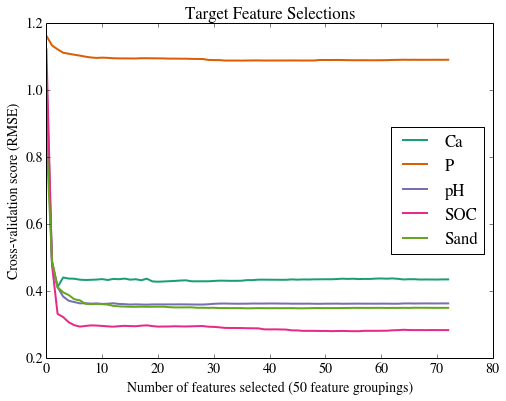

In [80]:
# plot the feature selection versus cross-validation score
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.xlabel("Number of features selected (50 feature groupings)")
plt.ylabel("Cross-validation score (RMSE)")
plt.title("Target Feature Selections")
plt.plot(range(0,73),ca_scores[:73], label='Ca')
plt.plot(range(0,73),p_scores[:73], label='P')
plt.plot(range(0,73),ph_scores[:73], label='pH')
plt.plot(range(0,73),soc_scores[:73], label='SOC')
plt.plot(range(0,73),sand_scores[:73], label='Sand')
plt.legend(loc='right')
plt.show()

#### Grid Search with less features

In [62]:
# Re-tune the model parameters with reduced number of features.
# This example is for the Ca target, with the top 20 feature groups
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(len(train_scaled_redCa20), n_iter=5, test_size=0.25, random_state=35)
print 'Ca reduced - 20 feature groups (50 per group)'
param_grid = [{'C': [100, 125, 150],'epsilon':[0.05, 0.08,0.10], 'gamma':[1e-3, 5e-4, 1e-4]}]

svr = SVR()
clf = GridSearchCV(svr, param_grid, cv=cv, scoring=rmse_scorer, verbose=1)
clf.fit(train_scaled_redCa20, target[:,0])
print clf.grid_scores_
print clf.best_params_

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:   54.9s


Ca reduced - 20 feature groups (50 per group)
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[mean: -0.30527, std: 0.05038, params: {'epsilon': 0.05, 'C': 100, 'gamma': 0.001}, mean: -0.29187, std: 0.02354, params: {'epsilon': 0.05, 'C': 100, 'gamma': 0.0005}, mean: -0.36619, std: 0.05811, params: {'epsilon': 0.05, 'C': 100, 'gamma': 0.0001}, mean: -0.30707, std: 0.05179, params: {'epsilon': 0.08, 'C': 100, 'gamma': 0.001}, mean: -0.28971, std: 0.01952, params: {'epsilon': 0.08, 'C': 100, 'gamma': 0.0005}, mean: -0.36314, std: 0.05792, params: {'epsilon': 0.08, 'C': 100, 'gamma': 0.0001}, mean: -0.30997, std: 0.05359, params: {'epsilon': 0.1, 'C': 100, 'gamma': 0.001}, mean: -0.29098, std: 0.01830, params: {'epsilon': 0.1, 'C': 100, 'gamma': 0.0005}, mean: -0.36382, std: 0.05899, params: {'epsilon': 0.1, 'C': 100, 'gamma': 0.0001}, mean: -0.30906, std: 0.04384, params: {'epsilon': 0.05, 'C': 125, 'gamma': 0.001}, mean: -0.29048, std: 0.02743, params: {'epsilon': 0.05, 'C

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.5min finished


#### Load reduced-feature data

In [59]:
ranking_Ca = np.loadtxt('data/Africa_soil/ranking_Ca.txt', dtype=int)
ranking_P = np.loadtxt('data/Africa_soil/ranking_P.txt', dtype=int)
ranking_Ph = np.loadtxt('data/Africa_soil/ranking_Ph.txt', dtype=int)
ranking_SOC = np.loadtxt('data/Africa_soil/ranking_SOC.txt', dtype=int)
ranking_Sand = np.loadtxt('data/Africa_soil/ranking_Sand.txt', dtype=int)

train_scaled_redCa20 = np.array(train_scaled[:,0:1])
test_scaled_redCa20 = np.array(test_scaled[:,0:1])
for i in range(1,len(ranking_Ca)):
    if ranking_Ca[i] <= 20:
        train_scaled_redCa20 = np.concatenate((train_scaled_redCa20,train_scaled[:,i:(i+1)]),1)
        test_scaled_redCa20 = np.concatenate((test_scaled_redCa20,test_scaled[:,i:(i+1)]),1)
print np.shape(train_scaled_redCa20), np.shape(test_scaled_redCa20)

train_scaled_redP8 = np.array(train_scaled[:,0:1])
test_scaled_redP8 = np.array(test_scaled[:,0:1])
for i in range(1,len(ranking_P)):
    if ranking_P[i] <= 8:
        train_scaled_redP8 = np.concatenate((train_scaled_redP8,train_scaled[:,i:(i+1)]),1)
        test_scaled_redP8 = np.concatenate((test_scaled_redP8,test_scaled[:,i:(i+1)]),1)
print np.shape(train_scaled_redP8), np.shape(test_scaled_redP8)

train_scaled_redPh11 = np.array(train_scaled[:,0:1])
test_scaled_redPh11 = np.array(test_scaled[:,0:1])
for i in range(1,len(ranking_Ph)):
    if ranking_Ph[i] <= 11:
        train_scaled_redPh11 = np.concatenate((train_scaled_redPh11,train_scaled[:,i:(i+1)]),1)
        test_scaled_redPh11 = np.concatenate((test_scaled_redPh11,test_scaled[:,i:(i+1)]),1)
print np.shape(train_scaled_redPh11), np.shape(test_scaled_redPh11)

train_scaled_redSOC7 = np.array(train_scaled[:,3:4])
test_scaled_redSOC7 = np.array(test_scaled[:,3:4])
for i in range(4,len(ranking_SOC)):
    if ranking_SOC[i] <= 7:
        train_scaled_redSOC7 = np.concatenate((train_scaled_redSOC7,train_scaled[:,i:(i+1)]),1)
        test_scaled_redSOC7 = np.concatenate((test_scaled_redSOC7,test_scaled[:,i:(i+1)]),1)
print np.shape(train_scaled_redSOC7), np.shape(test_scaled_redSOC7)

train_scaled_redSand10 = np.array(train_scaled[:,4:5])
test_scaled_redSand10 = np.array(test_scaled[:,4:5])
for i in range(5,len(ranking_Sand)):
    if ranking_Sand[i] <= 10:
        train_scaled_redSand10 = np.concatenate((train_scaled_redSand10,train_scaled[:,i:(i+1)]),1)
        test_scaled_redSand10 = np.concatenate((test_scaled_redSand10,test_scaled[:,i:(i+1)]),1)
print np.shape(train_scaled_redSand10), np.shape(test_scaled_redSand10)

(1157, 980) (727, 980)
(1157, 380) (727, 380)
(1157, 530) (727, 530)
(1157, 330) (727, 330)
(1157, 480) (727, 480)


#### Cross-validate preferred SVR models

In [63]:
## SVM regression with cross-validation##
# This example script is for my final reduced feature model

from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

## 3-1 split cross-validation ##
#random_states = [100, 10, 500, 700, 50] # 5 iterations
random_states = [100, 10, 500, 700, 50, 5, 67, 222, 673, 490] # 10 iterations
#random_states = [80, 12, 410, 61, 196, 383, 829, 142, 592, 786] # 10 iterations - 2
#random_states = [9, 863, 54, 293, 442, 98, 395, 553, 139, 29] # 10 interations - 3
cv = 1
mcrmse_all = []
for r in random_states:
# Split the data into a training set and a test set
    X_trainCa20, X_testCa20, y_train, y_test = train_test_split(train_scaled_redCa20, target, test_size=0.25,random_state=r)
    X_trainP8, X_testP8, y_train, y_test = train_test_split(train_scaled_redP8, target, test_size=0.25,random_state=r)
    X_trainPh11, X_testPh11, y_train, y_test = train_test_split(train_scaled_redPh11, target, test_size=0.25,random_state=r)
    X_trainSOC7, X_testSOC7, y_train, y_test = train_test_split(train_scaled_redSOC7, target, test_size=0.25,random_state=r)
    X_trainSand10, X_testSand10, y_train, y_test = train_test_split(train_scaled_redSand10, target, test_size=0.25,random_state=r)
    
    # Fit the training data and make prediction
    clf = SVR(kernel='rbf', C=125.0, epsilon=0.08, tol=0.001, gamma=5e-4)
    y_pred_Ca = clf.fit(X_trainCa20, y_train[:,0]).predict(X_testCa20)
    clf = SVR(kernel='rbf', C=17.5, epsilon=0.1, tol=0.001, gamma=0.01)
    y_pred_P = clf.fit(X_trainP8, y_train[:,1]).predict(X_testP8)
    clf = SVR(kernel='rbf', C=5000.0, epsilon=0.08, tol=0.001, gamma=1e-4)
    y_pred_pH = clf.fit(X_trainPh11, y_train[:,2]).predict(X_testPh11)
    clf = SVR(kernel='rbf', C=10000.0, epsilon=0.08, tol=0.001, gamma=5e-5)
    y_pred_SOC = clf.fit(X_trainSOC7, y_train[:,3]).predict(X_testSOC7)
    clf = SVR(kernel='rbf', C=10000.0, epsilon=0.14, tol=0.001, gamma=5e-5)
    y_pred_Sand = clf.fit(X_trainSand10, y_train[:,4]).predict(X_testSand10)

    # Calculate error metrics
    from sklearn.metrics import mean_squared_error
    mseCa = mean_squared_error(y_test[:,0], y_pred_Ca)
    mseP = mean_squared_error(y_test[:,1], y_pred_P)
    msepH = mean_squared_error(y_test[:,2], y_pred_pH)
    mseSOC = mean_squared_error(y_test[:,3], y_pred_SOC)
    mseSand = mean_squared_error(y_test[:,4], y_pred_Sand)
    mse = [mseCa, mseP, msepH, mseSOC, mseSand]
    rmse = np.sqrt(mse)
    mcrmse = 0.2*(np.sum(rmse))
    print 'CV',cv,'RMSE is',rmse
    print 'CV',cv,'MCRMSE is',mcrmse
    mcrmse_all.append(mcrmse)
    cv +=1
print 'cross validated MCRMSE mean =',np.mean(mcrmse_all),'std =',np.std(mcrmse_all) 

CV 1 RMSE is [ 0.24641654  0.85582082  0.32486847  0.36439985  0.35607111]
CV 1 MCRMSE is 0.429515359376
CV 2 RMSE is [ 0.14994564  0.61288672  0.2686207   0.3416217   0.28221591]
CV 2 MCRMSE is 0.331058133279
CV 3 RMSE is [ 0.22024889  0.73569497  0.27474387  0.24114516  0.29564548]
CV 3 MCRMSE is 0.353495674167
CV 4 RMSE is [ 0.26503699  0.46331664  0.28412832  0.33301199  0.30507426]
CV 4 MCRMSE is 0.330113640197
CV 5 RMSE is [ 0.20711993  0.77407499  0.31847252  0.30810041  0.32480561]
CV 5 MCRMSE is 0.38651469102
CV 6 RMSE is [ 0.28518306  0.8537193   0.28277142  0.27705227  0.29306091]
CV 6 MCRMSE is 0.398357390931
CV 7 RMSE is [ 0.33033721  0.5718999   0.28014382  0.34251458  0.3316334 ]
CV 7 MCRMSE is 0.371305781816
CV 8 RMSE is [ 0.24153916  0.61714995  0.2714184   0.31161794  0.29285759]
CV 8 MCRMSE is 0.346916608144
CV 9 RMSE is [ 0.32926437  0.58851082  0.34379599  0.35743796  0.35386153]
CV 9 MCRMSE is 0.394574134942
CV 10 RMSE is [ 0.36090914  1.35060572  0.31245346  0.29

## Final models

In [228]:
## SVM regression final model using reduced features ##
clf = SVR(kernel='rbf', C=125.0, epsilon=0.08, tol=0.001, gamma=5e-4)
preds_Ca = clf.fit(train_scaled_redCa20, target[:,0]).predict(test_scaled_redCa20)
clf = SVR(kernel='rbf', C=17.5, epsilon=0.1, tol=0.001, gamma=1e-2)
preds_P = clf.fit(train_scaled_redP8, target[:,1]).predict(test_scaled_redP8)
clf = SVR(kernel='rbf', C=5000.0, epsilon=0.08, tol=0.001, gamma=1e-4)
preds_pH = clf.fit(train_scaled_redPh11, target[:,2]).predict(test_scaled_redPh11)
clf = SVR(kernel='rbf', C=10000.0, epsilon=0.08, tol=0.001, gamma=5e-5)
preds_SOC = clf.fit(train_scaled_redSOC7, target[:,3]).predict(test_scaled_redSOC7)
clf = SVR(kernel='rbf', C=10000.0, epsilon=0.14, tol=0.001, gamma=5e-5)
preds_Sand = clf.fit(train_scaled_redSand10, target[:,4]).predict(test_scaled_redSand10)
sample_submission['Ca'] = preds_Ca
sample_submission['P'] = preds_P
sample_submission['pH'] = preds_pH
sample_submission['SOC'] = preds_SOC
sample_submission['Sand'] = preds_Sand
sample_submission.to_csv('data/Africa_soil/SVMReg_noCO2_GS_scaRed_low.csv', index = False)

## SVM regression final model using all the features except the CO2 bands ##
clf = SVR(kernel='rbf', C=300.0, epsilon=0.1, tol=0.001, gamma=1e-4)
preds_Ca = clf.fit(train_scaled target[:,0]).predict(test_scaled)
clf = SVR(kernel='rbf', C=10, epsilon=0.01, tol=0.001, gamma=5e-3)
preds_P = clf.fit(train_scaled, target[:,1]).predict(test_scaled)
clf = SVR(kernel='rbf', C=1000.0, epsilon=0.1, tol=0.001, gamma=5e-5)
preds_pH = clf.fit(train_scaled, target[:,2]).predict(test_scaled)
clf = SVR(kernel='rbf', C=10000.0, epsilon=0.04, tol=0.001, gamma=1e-5)
preds_SOC = clf.fit(train_scaled, target[:,3]).predict(test_scaled)
clf = SVR(kernel='rbf', C=15000.0, epsilon=0.1, tol=0.001, gamma=1e-5)
preds_Sand = clf.fit(train_scaled, target[:,4]).predict(test_scaled)
sample_submission['Ca'] = preds_Ca
sample_submission['P'] = preds_P
sample_submission['pH'] = preds_pH
sample_submission['SOC'] = preds_SOC
sample_submission['Sand'] = preds_Sand
sample_submission.to_csv('data/Africa_soil/SVMReg_noCO2_GS_scaled.csv', index = False)